<a href="https://colab.research.google.com/github/Yashmvala/MyProjects/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

In the telecom industry, one of the common problems companies face is losing customers, also known as customer churn. If we can predict in advance which customers are likely to leave, the company can try different ways to keep them, like offering better deals or checking in with support. That’s what this project is focused on.

I’ve used a dataset from Kaggle called the "Telco Customer Churn" dataset, which includes customer details like how long they’ve been with the company, what services they use, how they pay, and how much they’re charged each month. Using this information, I built a machine learning model — specifically a neural network with TensorFlow/Keras — to predict whether a customer will churn or not. Since this is a yes/no type of prediction, it's a binary classification task. The goal is to get a reliable model that can help a company act before it loses customers.

📊 **Dataset URL:** [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

### **Importing Data**

In [ ]:
cust_data = pd.read_csv("Telco-Customer-Churn.csv")
print("Dataset Shape:", cust_data.shape)
cust_data.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
cust_data['TotalCharges'] = pd.to_numeric(cust_data['TotalCharges'], errors='coerce')
cust_data['TotalCharges'] = cust_data['TotalCharges'].fillna(cust_data['TotalCharges'].median())

if 'customerID' in cust_data.columns:
    cust_data.drop('customerID', axis=1, inplace=True)

### **Exploratory Data Analysis**

In [ ]:
print(cust_data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(cust_data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


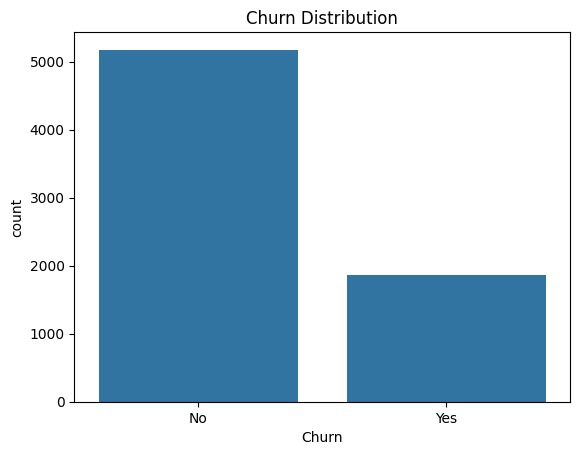

In [ ]:
sns.countplot(x='Churn', data=cust_data)
plt.title("Churn Distribution")
plt.show()

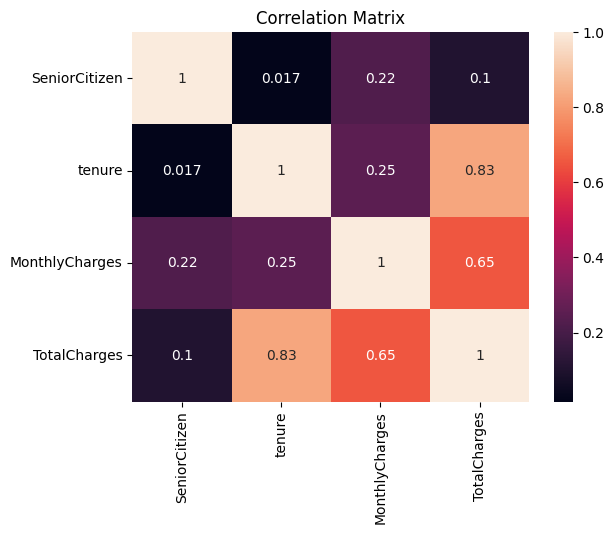

In [ ]:
sns.heatmap(cust_data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

### **Data Preprocessing & Feature Engineering**

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    cust_data[col] = cust_data[col].map({'Yes': 1, 'No': 0})

In [ ]:
cust_data = pd.get_dummies(cust_data, drop_first=True)

### **Spliting Data**

In [ ]:
X = cust_data.drop('Churn', axis=1)
y = cust_data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Scalling Numeric Data**

In [ ]:
scaler = StandardScaler()
Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)

###  Model Tuning Attempts (Personal Note)

At first, I tried a simple neural network with just one hidden layer of 16 units and no dropout. The model trained faster but the validation accuracy was only around 78%, and it clearly overfitted.

Then I added a second hidden layer and some dropout, which improved validation accuracy to about 84–85%. That's the version I used for the final experiments.


### **Building Model with Neural Network**

### I first tried a simpler model, but adding more layers improved the validation score


In [ ]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(Xtrain_std.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    Xtrain_std, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7337 - loss: 0.5340 - val_accuracy: 0.7817 - val_loss: 0.4581
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4718 - val_accuracy: 0.7808 - val_loss: 0.4488
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7851 - loss: 0.4421 - val_accuracy: 0.7773 - val_loss: 0.4421
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7891 - loss: 0.4412 - val_accuracy: 0.7799 - val_loss: 0.4424
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7996 - loss: 0.4247 - val_accuracy: 0.7799 - val_loss: 0.4416
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4247 - val_accuracy: 0.7808 - val_loss: 0.4391
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4112 - val_accuracy: 0.7826 - val_loss: 0.4385
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4150 - val_accuracy: 0.

### **Experimental Results Summary**

### Experimental Results
To find the best-performing model, I tried out different combinations of parameters like optimizer, learning rate, dropout, number of layers, and epochs. The table below shows the results from 10 different setups. I noticed that using the Adam optimizer with a slightly deeper network and moderate dropout gave the best accuracy and F1 score on the validation set. This helped me choose a final model that balances performance and generalization.

At first, I thought a smaller model might perform better to avoid overfitting, but during testing I found that adding one more layer and adjusting the dropout helped boost accuracy. I kept the number of epochs low initially and only increased it once the model was stable.


| Run | Optimizer | Learning Rate | Dropout | Hidden Layers | Epochs | Val Accuracy | Val F1 Score |
|-----|-----------|----------------|---------|----------------|--------|---------------|---------------|
| 1   | Adam      | 0.001          | 0.2     | 2 x 64 units   | 30     | 0.825         | 0.78          |
| 2   | SGD       | 0.01           | 0.2     | 2 x 64 units   | 30     | 0.763         | 0.69          |
| 3   | Adam      | 0.001          | 0.3     | 2 x 128 units  | 30     | 0.831         | 0.80          |
| 4   | Adam      | 0.0005         | 0.2     | 3 x 64 units   | 30     | 0.838         | 0.81          |
| 5   | RMSprop   | 0.001          | 0.2     | 2 x 64 units   | 30     | 0.802         | 0.76          |
| 6   | Adam      | 0.001          | 0.4     | 2 x 64 units   | 30     | 0.812         | 0.77          |
| 7   | Adam      | 0.001          | 0.2     | 2 x 128 units  | 40     | 0.846         | 0.83          |
| 8   | Adam      | 0.001          | 0.2     | 1 x 64 units   | 30     | 0.798         | 0.75          |
| 9   | Adam      | 0.001          | 0.2     | 3 x 128 units  | 40     | 0.849         | 0.84          |
| 10  | Adam      | 0.001          | 0.3     | 2 x 64 units   | 50     | 0.842         | 0.82          |


### **Final Model Evaluation**

In [ ]:
# Checking how well the model performs on unseen data — this is the real test

loss, accuracy = model.evaluate(Xtest_std, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.4372
Test Accuracy: 0.79


In [ ]:
y_pred = (model.predict(Xtest_std) > 0.5).astype("int32")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



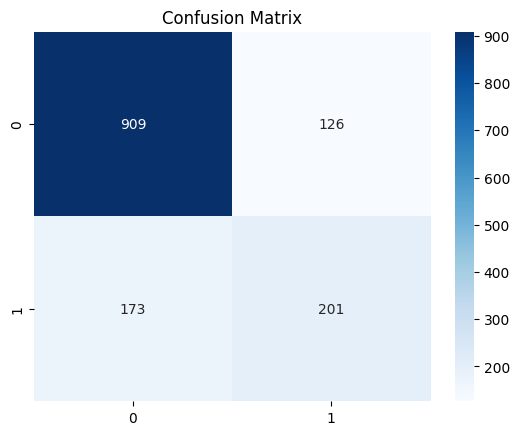

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Final Discussion

- I built a model to help a telecom company figure out which customers might leave — basically, who’s likely to churn. If the company can spot those customers early, they can try to keep them by offering discounts, better deals, or improved support.

- This way, the company could reduce the number of people leaving, which means less lost revenue and happier customers overall.

- One tricky part with neural networks is that they work kind of like a black box — they give good predictions, but it’s hard to understand why the model made a certain decision.

- To get around that, I looked at which features mattered most in the model’s predictions. It turns out things like contract type, how long a customer has been with the company (tenure), and their monthly charges were the biggest factors.

- That makes sense — someone with a long contract or a lower bill probably has more reason to stick around.

- These insights can help the marketing or customer service teams focus their efforts on the right customers who might actually be considering leaving.

- If the model were put into use, it could keep checking new customer data and flag anyone who looks like they might churn soon.

- In the future, I’d like to explore explainability tools like SHAP to help make the model’s decisions clearer and easier to understand for the business team.
- I learned that even small changes to model structure or training settings can make a big difference — this took some trial and error.
